In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [2]:
csv_file_path = './weather_data.csv'
df=pd.read_csv(csv_file_path)

## Data Preprocessing

In [3]:
unique_values = df['rain_or_not'].unique()
unique_values

array(['Rain', 'No Rain'], dtype=object)

In [4]:

df['rain_or_not']=df['rain_or_not'].replace({"Rain":1,"No Rain":0})

C:\Users\Verosha Kriyanjala\AppData\Local\Temp\ipykernel_22764\3404451146.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rain_or_not']=df['rain_or_not'].replace({"Rain":1,"No Rain":0})


In [5]:
empty_values_per_column=df.isna().sum()
empty_values_per_column

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [6]:
df.count()

date               311
avg_temperature    296
humidity           296
avg_wind_speed     296
rain_or_not        311
cloud_cover        296
pressure           311
dtype: int64

In [7]:
# df=df.dropna()
# df.count()

# Calculate median for each column, excluding non-numeric columns like 'Date'
median_values = df.drop(columns='date').mean()

# Fill missing values in each column with its respective median
df.fillna(median_values, inplace=True)

In [8]:
df.count()

date               311
avg_temperature    311
humidity           311
avg_wind_speed     311
rain_or_not        311
cloud_cover        311
pressure           311
dtype: int64

In [9]:
top_max_pressures = df['avg_wind_speed'].nlargest(1)
top_max_pressures

60    56.636041
Name: avg_wind_speed, dtype: float64

In [10]:
data = df['avg_wind_speed']
df1 = pd.DataFrame(data)

max_index = df1['avg_wind_speed'].idxmax()

mean_wind_speed = df1.loc[df.index != max_index, 'avg_wind_speed'].mean()

df.loc[max_index, 'avg_wind_speed'] = mean_wind_speed

print(df)

           date  avg_temperature   humidity  avg_wind_speed  rain_or_not  \
0    2023-01-01        23.745401  46.140905        7.845981            1   
1    2023-01-02        30.030503  59.876587        5.382457            1   
2    2023-01-03        28.365224  51.464618       13.158008            1   
3    2023-01-04        27.550929  53.103799        5.886677            1   
4    2023-01-05        23.639303  57.826186       12.248992            1   
..          ...              ...        ...             ...          ...   
306  2023-11-03        22.072834  37.756910        4.729355            0   
307  2023-11-04        19.645885  42.190604        8.092369            0   
308  2023-11-05        23.884496  36.205508       11.860847            1   
309  2023-11-06        18.168418  34.785000        4.781288            0   
310  2023-11-07        19.389714  37.717416        9.388371            0   

     cloud_cover     pressure  
0      20.851051   992.965681  
1      93.059521  1037.

In [11]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [12]:
df=df.drop(columns=["date"])

In [13]:
# Select numerical columns
numerical_columns = ["avg_temperature", "humidity", "avg_wind_speed", "pressure","cloud_cover"  ]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

   avg_temperature  humidity  avg_wind_speed  rain_or_not  cloud_cover  \
0        -0.337868 -0.475473        0.101832            1    -1.025852   
1         0.610800  0.258302       -0.458556            1     1.529894   
2         0.359444 -0.191075        1.310181            1    -1.351986   
3         0.236535 -0.103508       -0.343859            1     1.129427   
4        -0.353883  0.148767        1.103403            1    -0.416676   

   pressure  month  day  
0 -0.281128      1    1  
1  1.257899      1    2  
2  1.150926      1    3  
3 -1.127123      1    4  
4  1.014450      1    5  


## Graphs

### Each column along time series

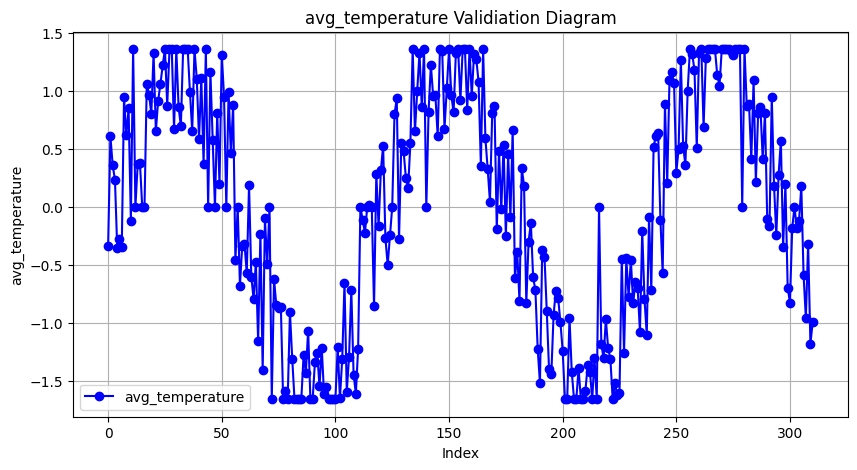

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['avg_temperature'], marker='o', linestyle='-', color='b', label='avg_temperature')

plt.xlabel('Index')
plt.ylabel('avg_temperature')
plt.title('avg_temperature Validiation Diagram')
plt.legend()
plt.grid(True)

plt.show()

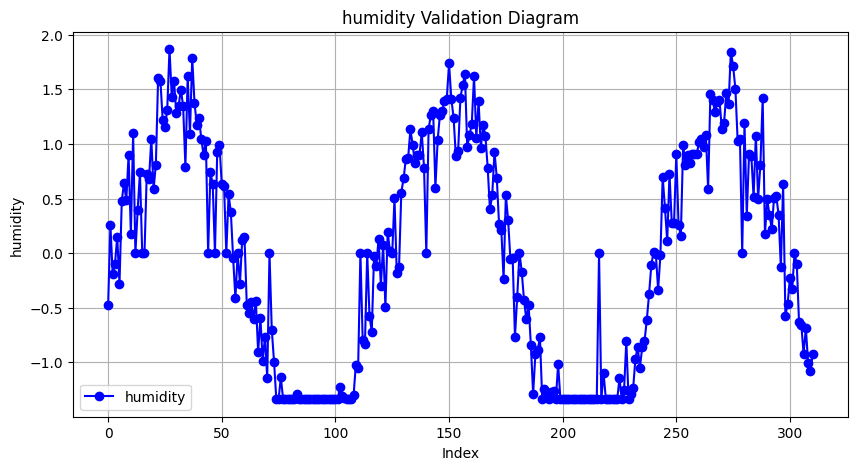

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['humidity'], marker='o', linestyle='-', color='b', label='humidity')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('humidity')
plt.title('humidity Validation Diagram')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

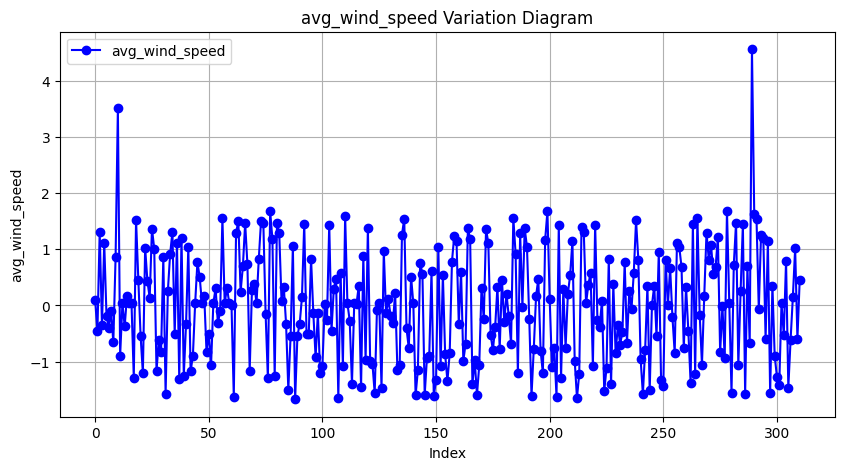

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['avg_wind_speed'], marker='o', linestyle='-', color='b', label='avg_wind_speed')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('avg_wind_speed')
plt.title('avg_wind_speed Variation Diagram')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

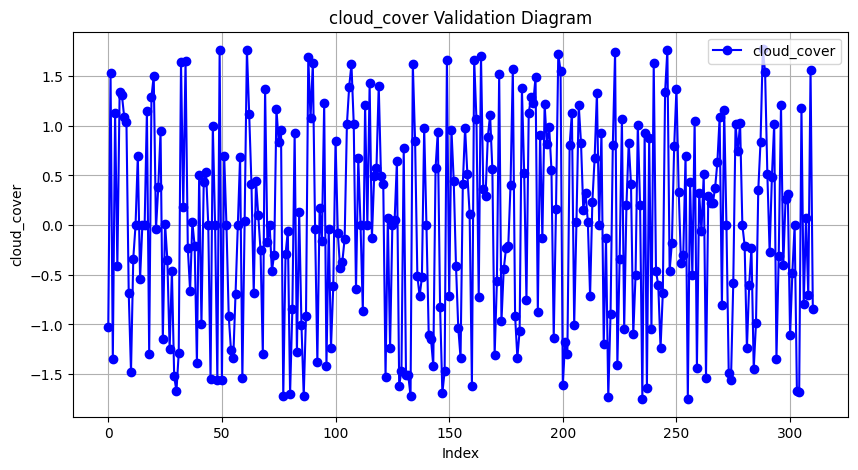

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['cloud_cover'], marker='o', linestyle='-', color='b', label='cloud_cover')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('cloud_cover')
plt.title('cloud_cover Validation Diagram')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

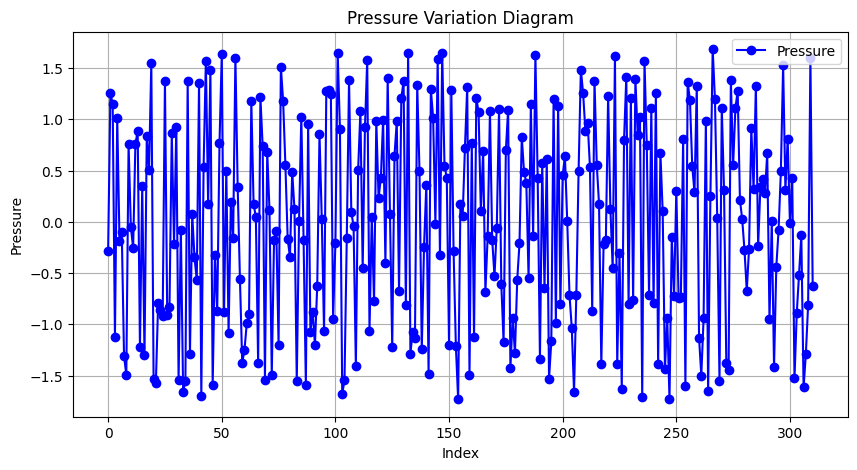

In [18]:

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['pressure'], marker='o', linestyle='-', color='b', label='Pressure')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Pressure')
plt.title('Pressure Variation Diagram')
plt.legend()
plt.grid(True)

plt.show()

### Correlation Analysis
Find relationships between variables

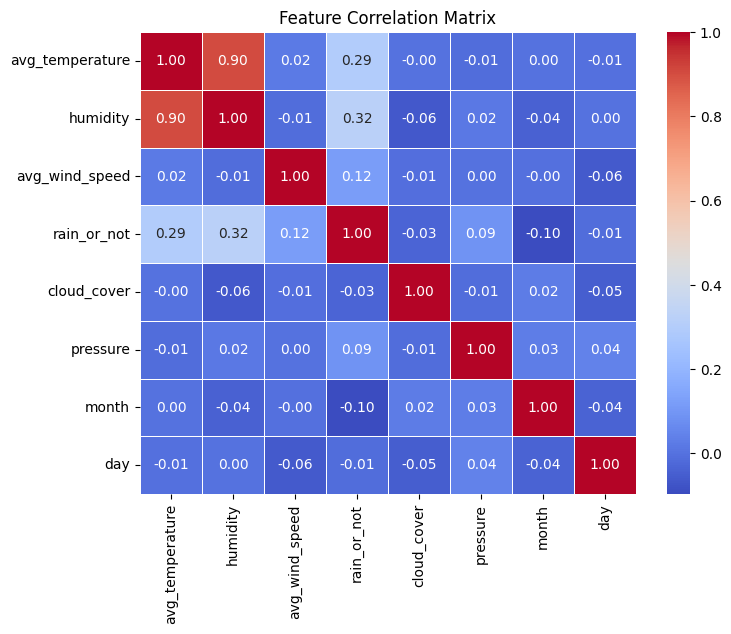

In [19]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


### Univariate Analysis (Feature Distributions)

#### Histograms
Check distributions of numerical features

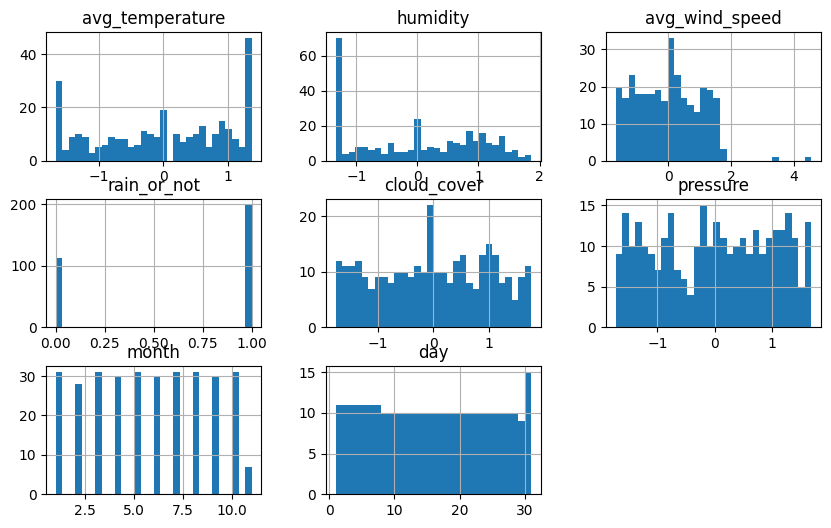

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
df.hist(figsize=(10, 6), bins=30)
plt.show()


#### Boxplots
Detect outliers

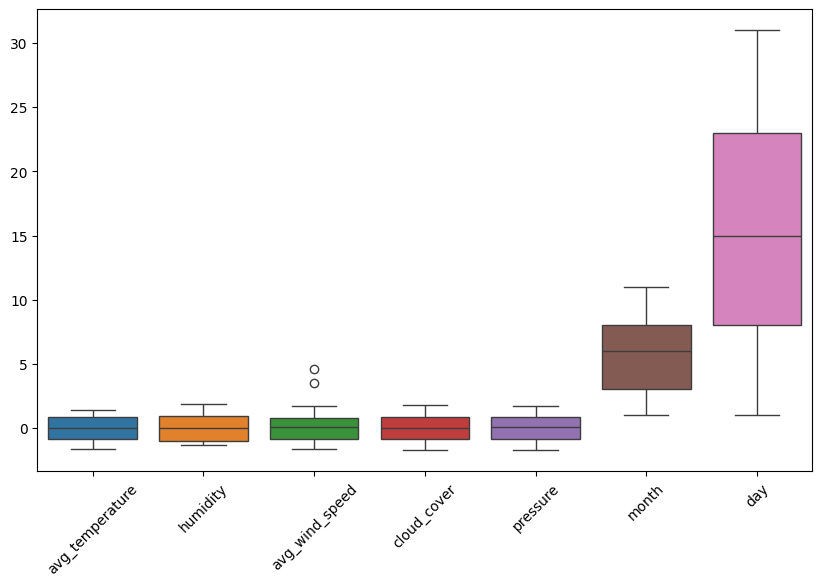

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["rain_or_not"]))
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis (Feature vs Target Relationship)

Use boxplots to analyze the impact of each feature on rain

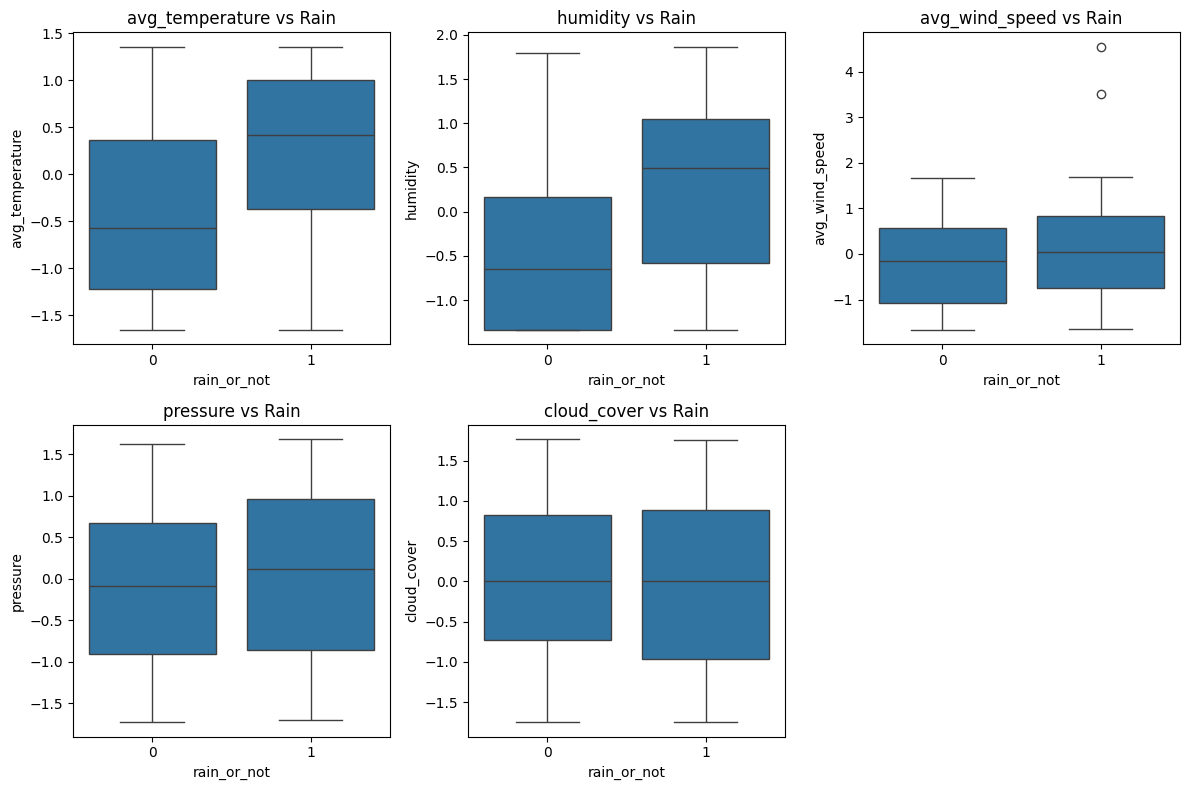

In [22]:
features = ["avg_temperature", "humidity", "avg_wind_speed", "pressure","cloud_cover"]
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["rain_or_not"], y=df[feature])
    plt.title(f"{feature} vs Rain")
    
plt.tight_layout()
plt.show()

In [23]:
df

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,month,day
0,-0.337868,-0.475473,0.101832,1,-1.025852,-0.281128,1,1
1,0.610800,0.258302,-0.458556,1,1.529894,1.257899,1,2
2,0.359444,-0.191075,1.310181,1,-1.351986,1.150926,1,3
3,0.236535,-0.103508,-0.343859,1,1.129427,-1.127123,1,4
4,-0.353883,0.148767,1.103403,1,-0.416676,1.014450,1,5
...,...,...,...,...,...,...,...,...
306,-0.590324,-0.923356,-0.607119,0,-0.797347,-1.614989,11,3
307,-0.956646,-0.686503,0.157879,0,0.069834,-1.287174,11,4
308,-0.316873,-1.006233,1.015111,1,-0.706544,-0.812030,11,5
309,-1.179654,-1.082118,-0.595306,0,1.565586,1.601092,11,6


### Rain Probability Over Time

Check seasonal trends in rain occurrences

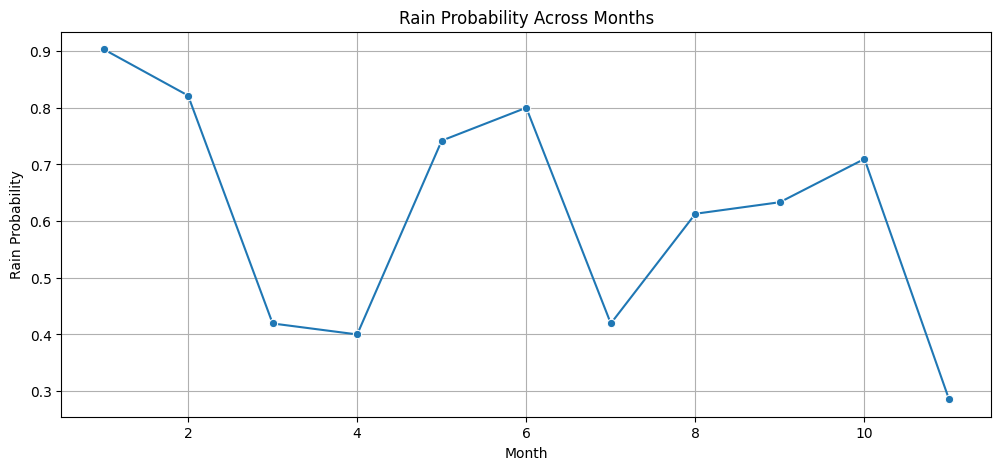

In [24]:
# Group by month and calculate average rain probability
monthly_rain = df.groupby("month")["rain_or_not"].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_rain.index, y=monthly_rain.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Rain Probability")
plt.title("Rain Probability Across Months")
plt.grid()
plt.show()

#### Pairplot (Feature Relationships)
Pairwise relationships help in spotting patterns

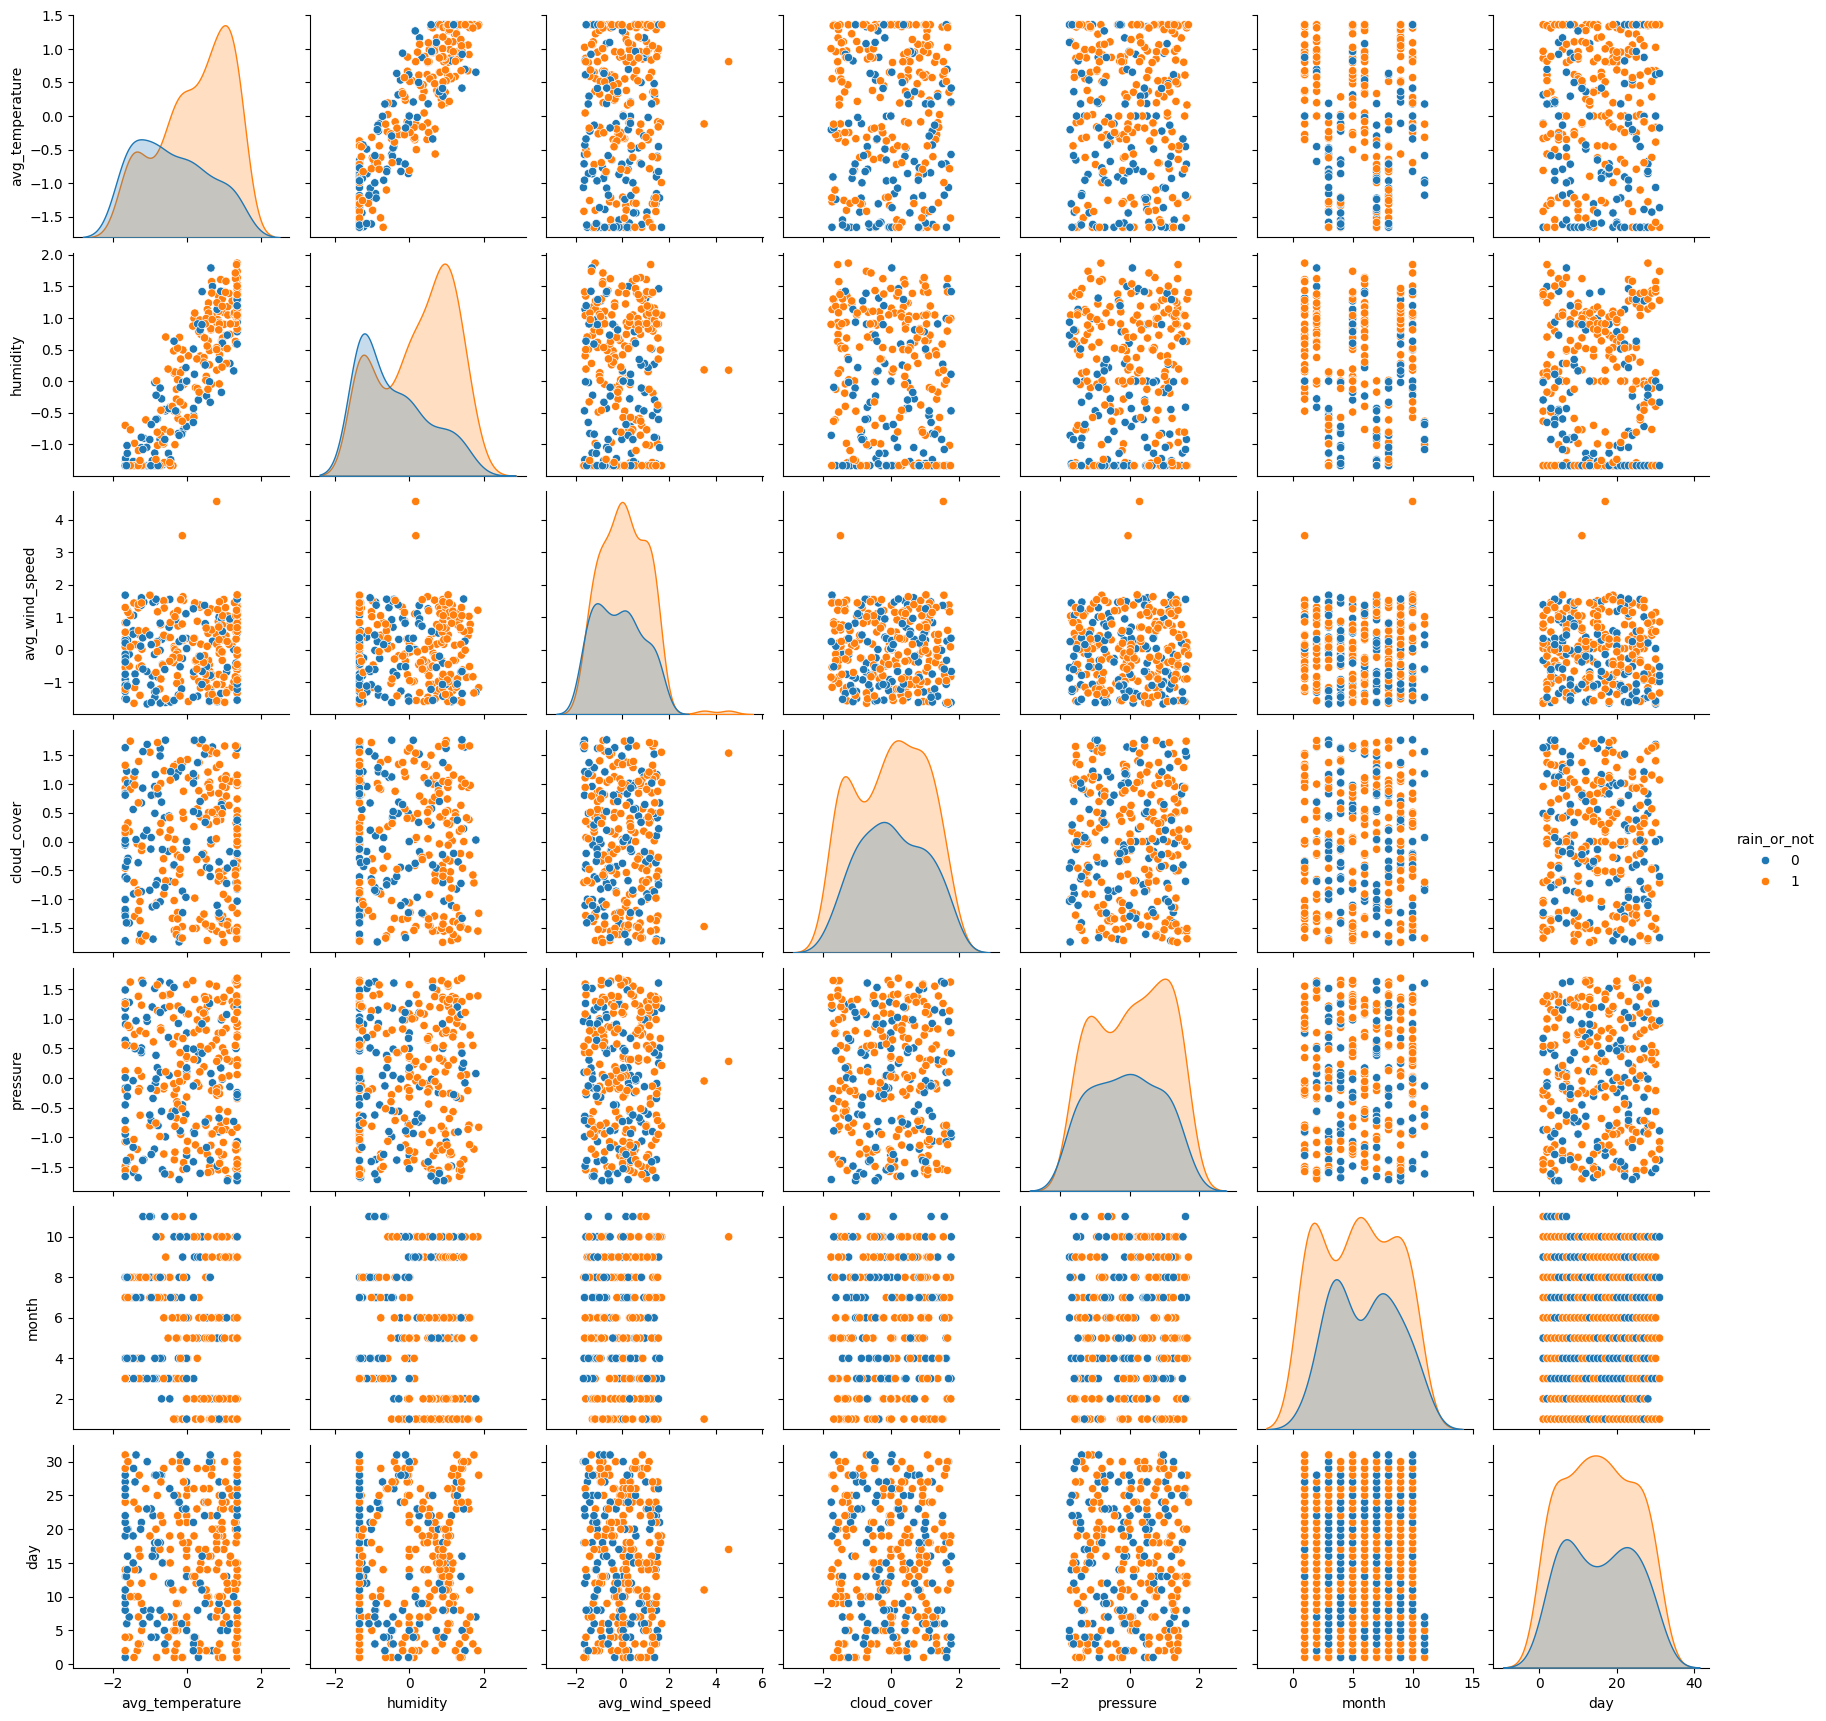

In [25]:
sns.pairplot(df, hue="rain_or_not", diag_kind="kde")
plt.show()

## Model Creation 

In [26]:
X = df.drop(columns=["rain_or_not"])
y = df["rain_or_not"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest

In [27]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Performance:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
               precision    recall  f1-score   support

           0       0.62      0.44      0.52        34
           1       0.73      0.85      0.78        60

    accuracy                           0.70        94
   macro avg       0.68      0.65      0.65        94
weighted avg       0.69      0.70      0.69        94



### Logistic Regression

In [28]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Performance:\n", classification_report(y_test, y_pred_log))

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.48      0.38      0.43        34
           1       0.69      0.77      0.72        60

    accuracy                           0.63        94
   macro avg       0.58      0.57      0.58        94
weighted avg       0.61      0.63      0.62        94



### Decision Trees

In [29]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Performance:\n", classification_report(y_test, y_pred_dt))

Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.34      0.35      0.35        34
           1       0.63      0.62      0.62        60

    accuracy                           0.52        94
   macro avg       0.48      0.48      0.48        94
weighted avg       0.52      0.52      0.52        94



### XGBoost

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(n_estimators=500, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Gradient Boosting (XGBoost) Performance:\n", classification_report(y_test, y_pred_xgb))

Gradient Boosting (XGBoost) Performance:
               precision    recall  f1-score   support

           0       0.50      0.47      0.48        34
           1       0.71      0.73      0.72        60

    accuracy                           0.64        94
   macro avg       0.60      0.60      0.60        94
weighted avg       0.63      0.64      0.64        94



## Feature Importance (Using Random Forest)

Check which features are most important for rain prediction

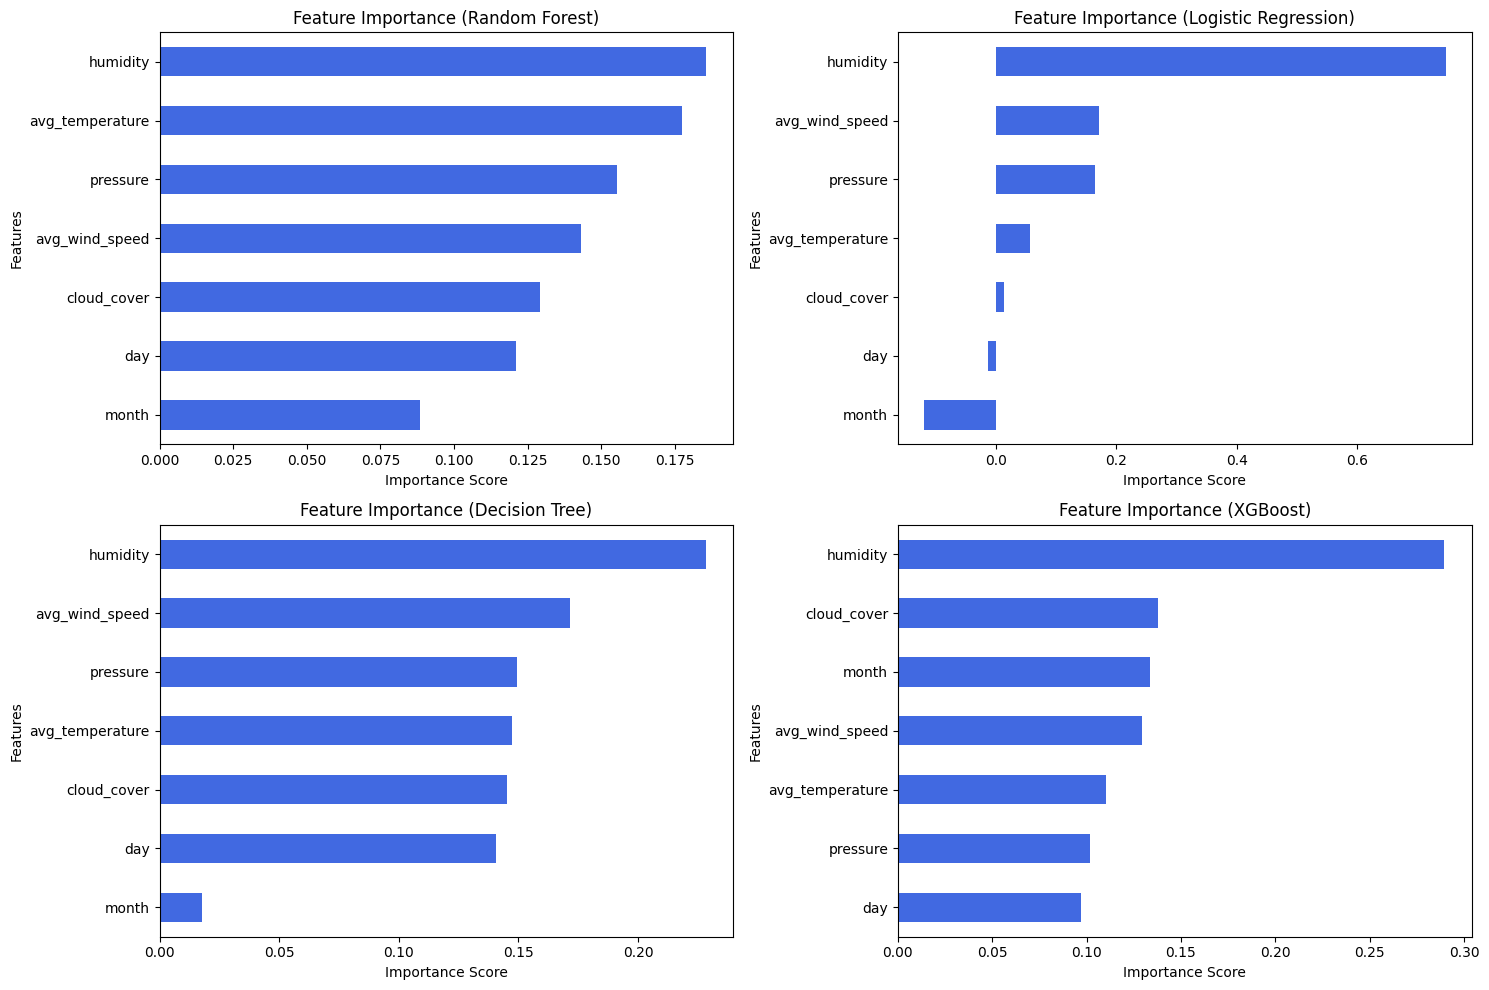

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance_rf.sort_values().plot(kind="barh", ax=axes[0, 0], color="royalblue")
axes[0, 0].set_title("Feature Importance (Random Forest)")
axes[0, 0].set_xlabel("Importance Score")
axes[0, 0].set_ylabel("Features")

feature_importance_log = pd.Series(log_model.coef_[0], index=X.columns)
feature_importance_log.sort_values().plot(kind="barh", ax=axes[0, 1], color="royalblue")
axes[0, 1].set_title("Feature Importance (Logistic Regression)")
axes[0, 1].set_xlabel("Importance Score")
axes[0, 1].set_ylabel("Features")

feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importance_dt.sort_values().plot(kind="barh", ax=axes[1, 0], color="royalblue")
axes[1, 0].set_title("Feature Importance (Decision Tree)")
axes[1, 0].set_xlabel("Importance Score")
axes[1, 0].set_ylabel("Features")

feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance_xgb.sort_values().plot(kind="barh", ax=axes[1, 1], color="royalblue")
axes[1, 1].set_title("Feature Importance (XGBoost)")
axes[1, 1].set_xlabel("Importance Score")
axes[1, 1].set_ylabel("Features")

plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

for model, acc in models.items():
    print(f"{model}: {acc:.4f}")


Logistic Regression: 0.6277
Decision Tree: 0.5213
Random Forest: 0.7021
XGBoost: 0.6383


In [33]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators': [100, 300, 500, 1000]}
# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best n_estimators:", grid_search.best_params_['n_estimators'])

In [34]:
# model = keras.Sequential([
#     keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input Layer + First Hidden Layer
#     keras.layers.Dense(8, activation='relu'),  # Second Hidden Layer
#     keras.layers.Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

In [36]:
# # Predict classes (binary output)
# y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)

# # Print classification report
# print("Neural Network Performance:\n", classification_report(y_test, y_pred_nn))

# # Calculate accuracy
# nn_accuracy = accuracy_score(y_test, y_pred_nn)
# print(f"Neural Network Accuracy: {nn_accuracy:.4f}")


In [38]:
# rain_prob_nn = model.predict(X_test_scaled)

# X_test_results = X_test.copy()
# X_test_results["Rain_Probability"] = rain_prob_nn

# print(X_test_results.head(10))

### Cross Validation
Random Forest

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

Logistic Regression Cross-Validation Accuracy: 0.6773 ± 0.0391
Decision Tree Cross-Validation Accuracy: 0.5396 ± 0.0557
Random Forest Cross-Validation Accuracy: 0.6037 ± 0.0164
XGBoost Cross-Validation Accuracy: 0.5575 ± 0.0494
